In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

In [35]:
df=pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [3]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [8]:
df['avg_glucose_level'].value_counts()

93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: avg_glucose_level, Length: 3979, dtype: int64

In [14]:
df.isnull().sum()/len(df)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
impute=SimpleImputer(missing_values=np.nan,strategy="mean")

In [25]:
bmi=np.array(df["bmi"])

In [26]:
bmi.reshape(-1,1)

array([[36.6],
       [ nan],
       [32.5],
       ...,
       [30.6],
       [25.6],
       [26.2]])

In [36]:
df1=df.copy()

In [37]:
impute.fit(df1[["bmi","avg_glucose_level"]])

SimpleImputer()

In [38]:






df1[["bmi","avg_glucose_level"]]=impute.transform(df[["bmi","avg_glucose_level"]])

In [39]:
df1.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


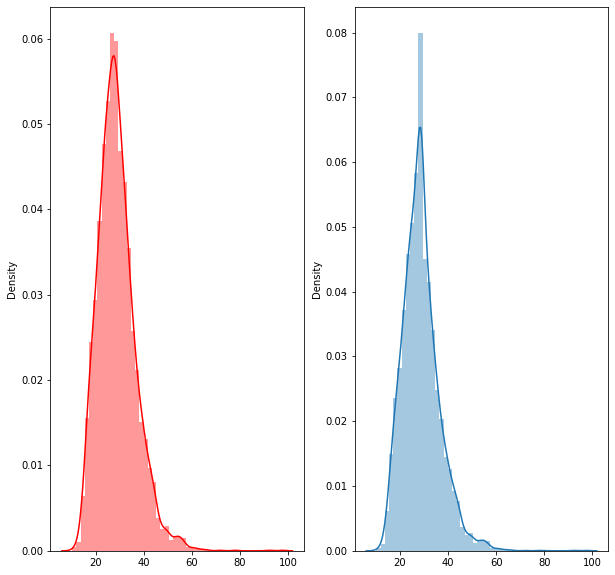

In [53]:
from seaborn.axisgrid import Grid
fig,ax=plt.subplots(1,2,figsize=(10,10)
                  )
sns.distplot(x=df["bmi"],ax=ax[0],color="r")
sns.distplot(x=df1["bmi"],ax=ax[1])

In [54]:
df1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [55]:
df2=df1.copy()

In [63]:
df2["ever_married_code"] = ord_enc.fit_transform(df2[["ever_married"]])
df2[["ever_married", "ever_married_code"]].head(11)

,ever_married,ever_married_code
0,Yes,1.0
1,Yes,1.0
2,Yes,1.0
3,Yes,1.0
4,Yes,1.0
5,Yes,1.0
6,Yes,1.0
7,No,0.0
8,Yes,1.0
9,Yes,1.0


In [ ]:
df2["ever_married"]=ord_enc.fit(df2["ever_married"])

In [65]:
df2["Residence_type"] = ord_enc.fit_transform(df2[["Residence_type"]])
df2[["ever_married", "ever_married_code"]].head(11)

,ever_married,ever_married_code
0,Yes,1.0
1,Yes,1.0
2,Yes,1.0
3,Yes,1.0
4,Yes,1.0
5,Yes,1.0
6,Yes,1.0
7,No,0.0
8,Yes,1.0
9,Yes,1.0


In [146]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_code
0,9046,Male,67.0,0,1,Yes,Private,1.0,228.69,36.600000,formerly smoked,1,1.0
1,51676,Female,61.0,0,0,Yes,Self-employed,0.0,202.21,28.893237,never smoked,1,1.0
2,31112,Male,80.0,0,1,Yes,Private,0.0,105.92,32.500000,never smoked,1,1.0
3,60182,Female,49.0,0,0,Yes,Private,1.0,171.23,34.400000,smokes,1,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,0.0,174.12,24.000000,never smoked,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,1.0,83.75,28.893237,never smoked,0,1.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,1.0,125.20,40.000000,never smoked,0,1.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,0.0,82.99,30.600000,never smoked,0,1.0
5108,37544,Male,51.0,0,0,Yes,Private,0.0,166.29,25.600000,formerly smoked,0,1.0


In [68]:
import plotly.express as px

In [140]:
px.histogram(df2,x="work_type",color="ever_married_code")

In [80]:
sns.color_palette()

AttributeError: ignored

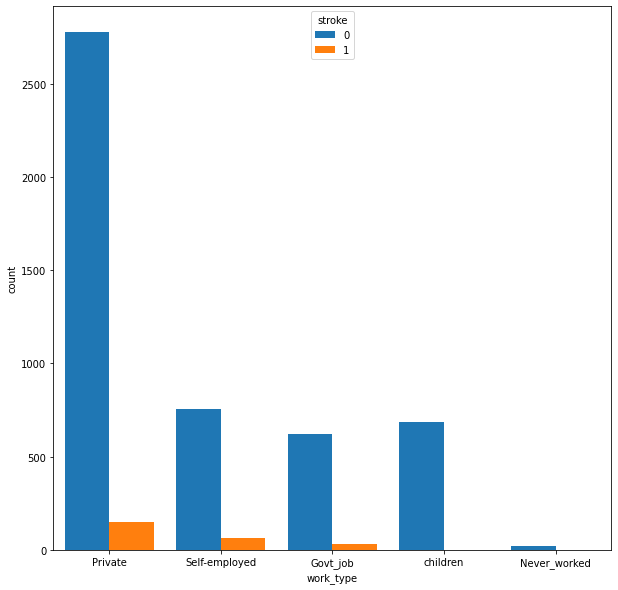

In [83]:
plt.figure(figsize=(10,10))
sns.countplot(x="work_type",data=df2,hue="stroke",saturation=2,palette="tab10",)


In [92]:
smok=df2.groupby("smoking_status")["stroke"].size().reset_index()

In [93]:
smok

,smoking_status,stroke
0,Unknown,1544
1,formerly smoked,885
2,never smoked,1892
3,smokes,789


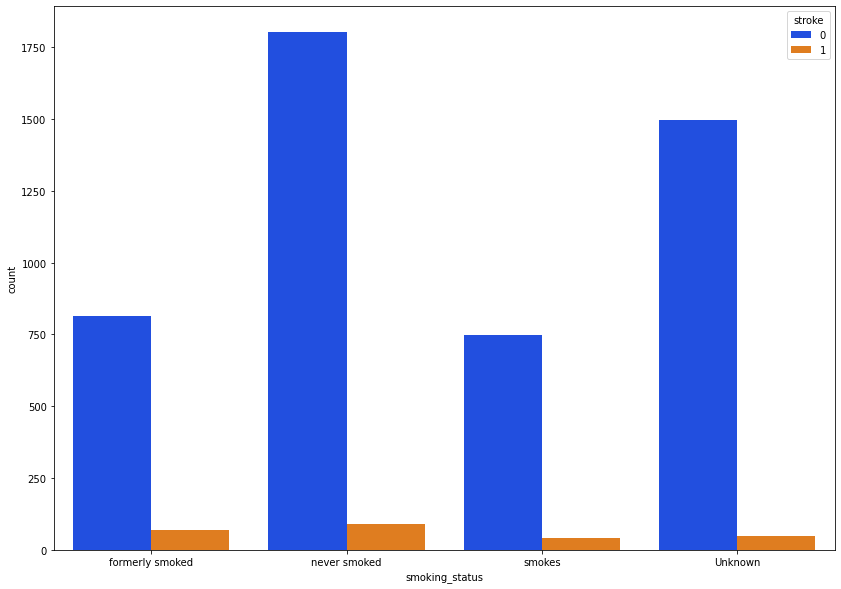

In [136]:
plt.figure(figsize=(14,10))

sns.countplot(x='smoking_status',data=df,hue="stroke",palette="bright")

In [115]:
wr=df2.groupby(["work_type"])["stroke"].size().reset_index()

In [116]:
wr

,work_type,stroke
0,Govt_job,657
1,Never_worked,22
2,Private,2925
3,Self-employed,819
4,children,687


In [137]:

df2.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'ever_married_code'],
      dtype='object')

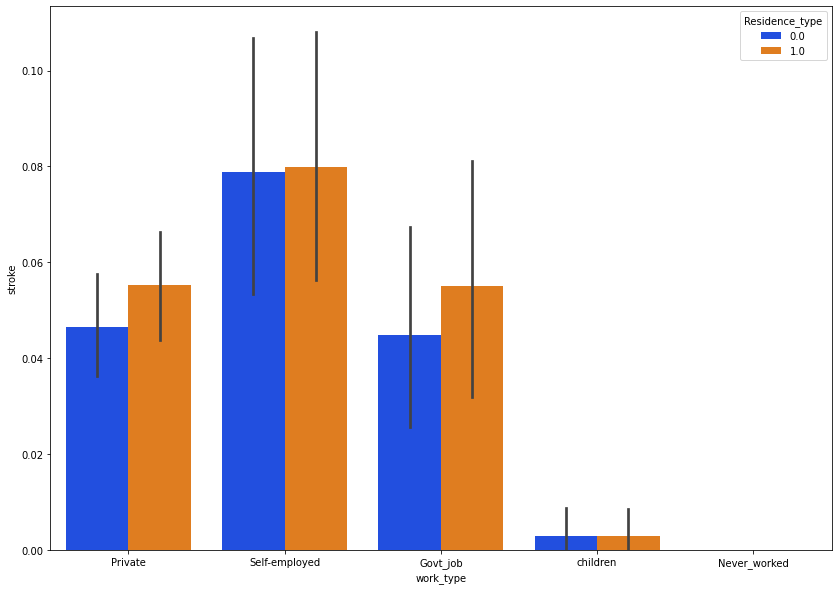

In [144]:
plt.figure(figsize=(14,10))
sns.barplot(x='work_type',y='stroke',data=df2,hue="Residence_type",palette="bright")



In [147]:
df2

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,ever_married_code
0,9046,Male,67.0,0,1,Yes,Private,1.0,228.69,36.600000,formerly smoked,1,1.0
1,51676,Female,61.0,0,0,Yes,Self-employed,0.0,202.21,28.893237,never smoked,1,1.0
2,31112,Male,80.0,0,1,Yes,Private,0.0,105.92,32.500000,never smoked,1,1.0
3,60182,Female,49.0,0,0,Yes,Private,1.0,171.23,34.400000,smokes,1,1.0
4,1665,Female,79.0,1,0,Yes,Self-employed,0.0,174.12,24.000000,never smoked,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,1.0,83.75,28.893237,never smoked,0,1.0
5106,44873,Female,81.0,0,0,Yes,Self-employed,1.0,125.20,40.000000,never smoked,0,1.0
5107,19723,Female,35.0,0,0,Yes,Self-employed,0.0,82.99,30.600000,never smoked,0,1.0
5108,37544,Male,51.0,0,0,Yes,Private,0.0,166.29,25.600000,formerly smoked,0,1.0


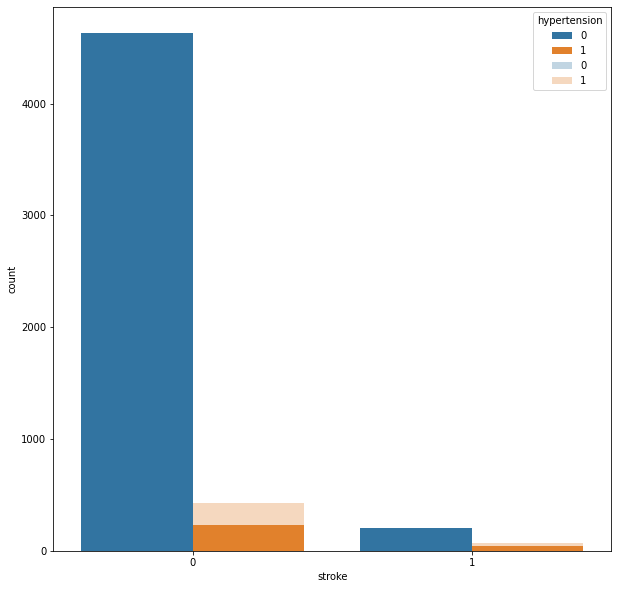

In [176]:
fig.ax=plt.subplots(1,figsize=(10,10))

sns.countplot(x='stroke',data=df2,hue='heart_disease')
sns.countplot(x='stroke',data=df2,hue='hypertension',alpha=0.3)


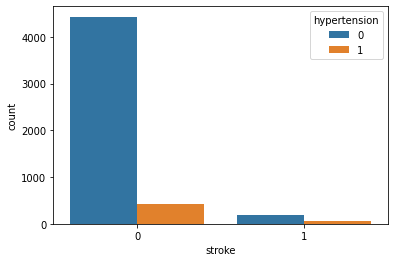

In [175]:

sns.countplot(x='stroke',data=df2,hue='hypertension')





In [180]:

df2["gender_code"]=ord_enc.fit_transform(df2[['gender']])

In [181]:

df2["work_type_code"]=ord_enc.fit_transform(df2[['work_type']])

In [184]:

df2["smoking_status_code"]=ord_enc.fit_transform(df2[['smoking_status']])

In [189]:
x=df2.select_dtypes(exclude=['object']).drop("stroke",axis=1
                                             )

In [190]:
y=df2.select_dtypes(exclude=['object'])["stroke"]


In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [236]:
knn=KNeighborsClassifier(n_neighbors=3)

In [215]:
from sklearn.model_selection import train_test_split

In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [205]:
x_train

,id,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,ever_married_code,gender_code,work_type_code,smoking_status_code
802,4970,79.00,0,0,0.0,112.64,28.5,1.0,1.0,3.0,1.0
3927,56137,62.00,0,0,1.0,88.32,36.3,1.0,0.0,2.0,0.0
2337,54590,21.00,0,0,0.0,59.52,33.7,0.0,0.0,2.0,2.0
3910,36548,31.00,0,0,1.0,65.70,30.4,1.0,1.0,0.0,1.0
1886,61171,31.00,0,0,0.0,59.63,19.9,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
4426,13846,43.00,0,0,0.0,88.00,30.6,1.0,1.0,0.0,2.0
466,1307,61.00,1,0,0.0,170.05,60.2,1.0,0.0,2.0,3.0
3092,31481,1.16,0,0,1.0,97.28,17.8,0.0,0.0,4.0,0.0
3772,61827,80.00,0,0,0.0,196.08,31.0,1.0,1.0,3.0,1.0


In [240]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [241]:
pre=knn.predict(x_test)

In [242]:
acc = knn.score(x_test, y_test)

In [243]:
acc

0.9403131115459883

In [244]:
from sklearn.metrics import r2_score

In [247]:

r2_score(y_test,pre)

-0.04741263440860255

In [248]:
1 - (1-knn.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)

0.9533241615030337